# Computer Vision Masterclass - Face detection

## OpenCV

### Loading the image

In [1]:
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
image = cv2.imread('/content/marvel.jpg')

In [7]:
image.shape

(626, 563, 3)

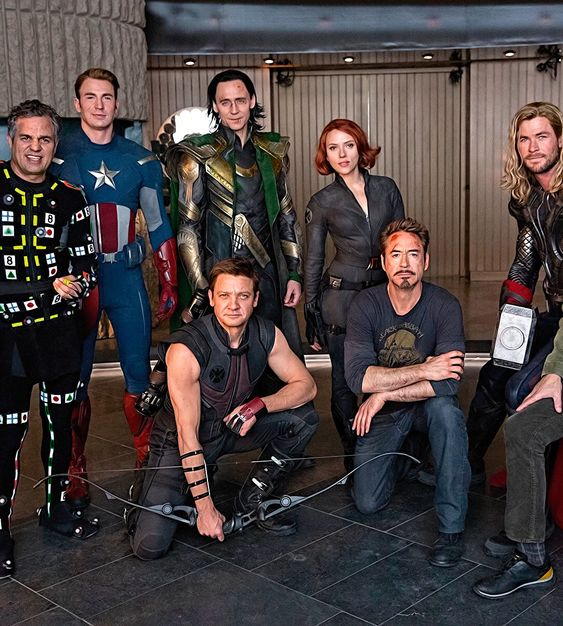

In [8]:
#cv2.imshow(image)
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [9]:
image = cv2.resize(image, (800, 600))
image.shape

(600, 800, 3)

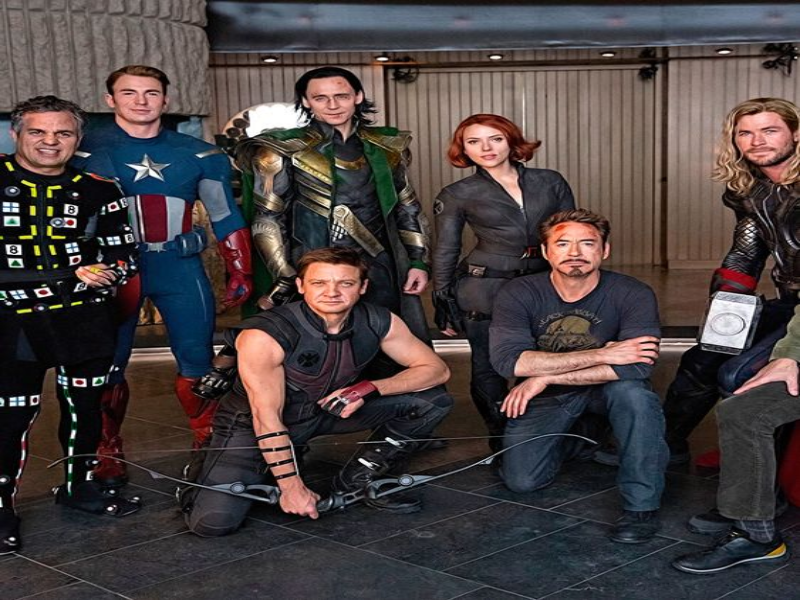

In [10]:
cv2_imshow(image)

In [11]:
600 * 800 * 3, 600 * 800, 1440000 - 480000

(1440000, 480000, 960000)

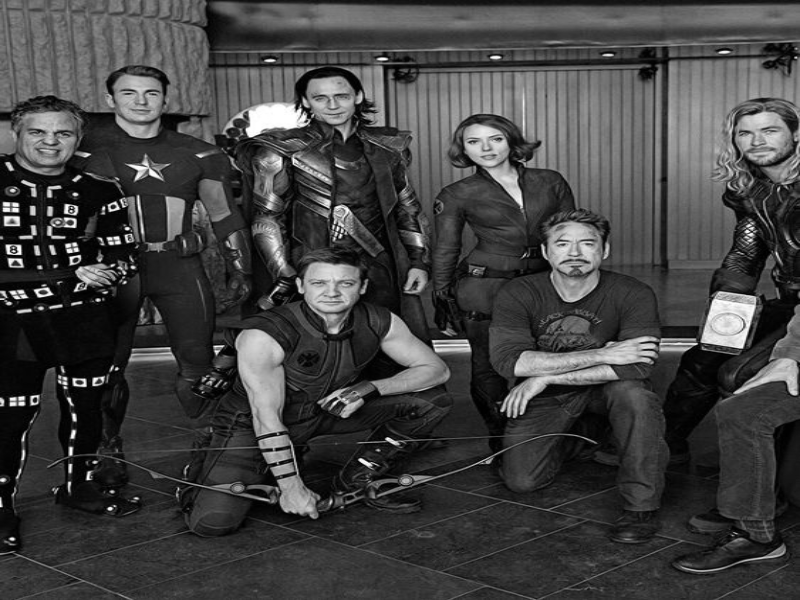

In [12]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_gray)

In [13]:
image.shape

(600, 800, 3)

In [14]:
image_gray.shape

(600, 800)

### Detecting faces

In [15]:
face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Computer Vision Masterclass/Cascades/haarcascade_frontalface_default.xml')

In [16]:
detections = face_detector.detectMultiScale(image_gray)

In [17]:
detections

array([[306,  76,  53,  53],
       [110,  70,  60,  60],
       [731, 109,  57,  57],
       [ 18, 109,  63,  63],
       [461, 121,  50,  50],
       [429, 242,  27,  27],
       [544, 218,  63,  63],
       [300, 259,  62,  62]], dtype=int32)

In [18]:
len(detections)

8

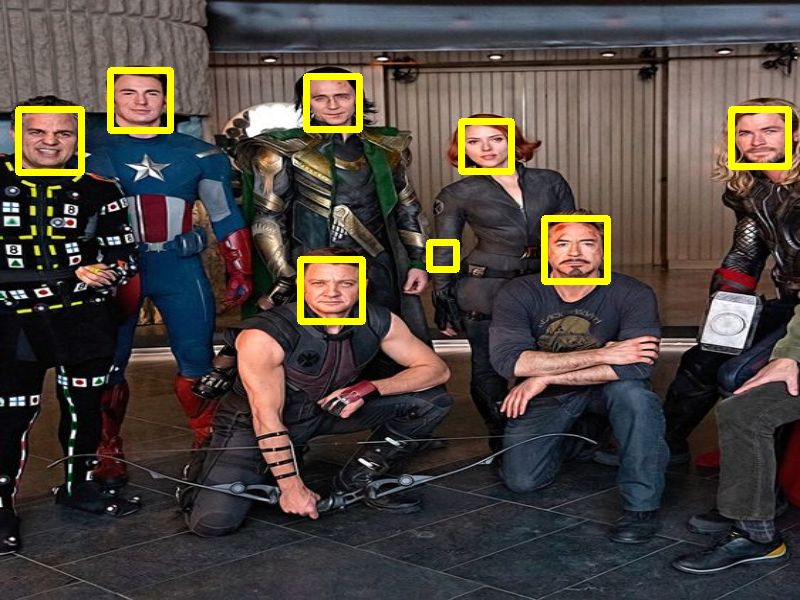

In [19]:
for (x, y, w, h) in detections:
  #print(x, y, w, h)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,255), 5)
cv2_imshow(image)

### Haarcascade parameters

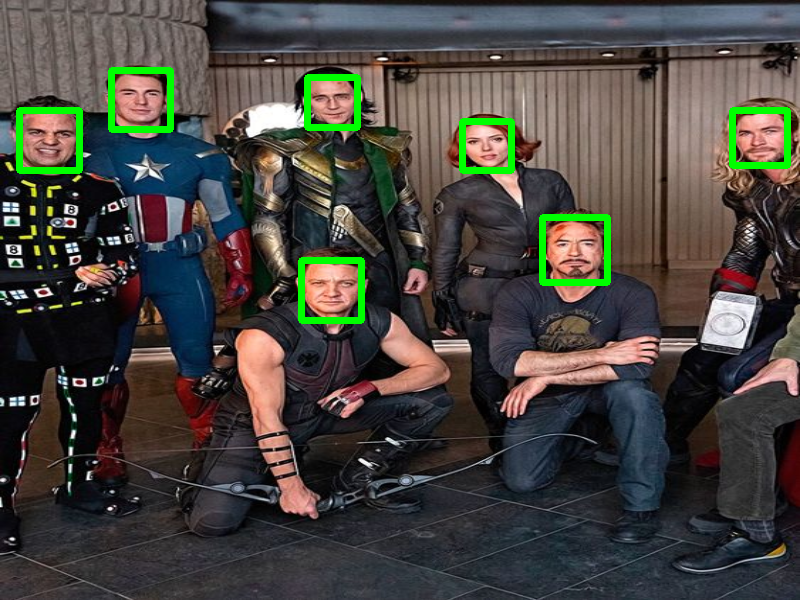

In [22]:
image = cv2.imread('/content/marvel.jpg')
image = cv2.resize(image, (800, 600))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = face_detector.detectMultiScale(image_gray, scaleFactor = 1.15)
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 5)
cv2_imshow(image)

49 49
48 48
43 43
49 49
54 54
56 56
55 55


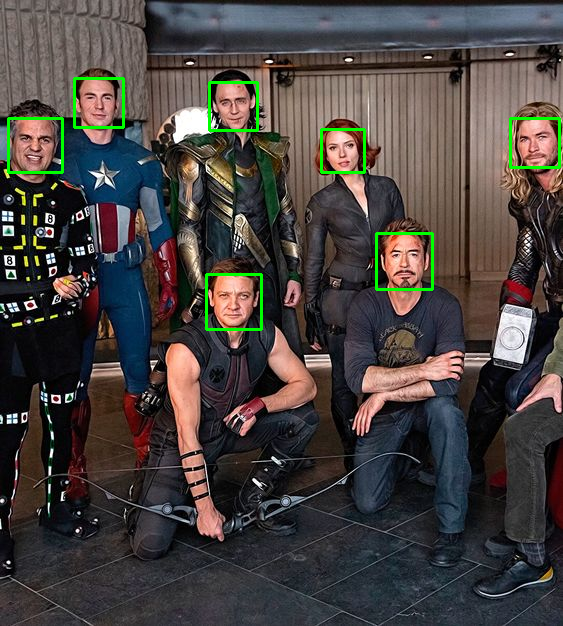

In [23]:
image = cv2.imread('/content/marvel.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.2, minNeighbors=7,
                                            minSize=(20,20), maxSize=(100,100))
for (x, y, w, h) in detections:
  print(w, h)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

### Eye detection

In [24]:
eye_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Computer Vision Masterclass/Cascades/haarcascade_eye.xml')

(650, 500, 3)
37 37
40 40
35 35
34 34


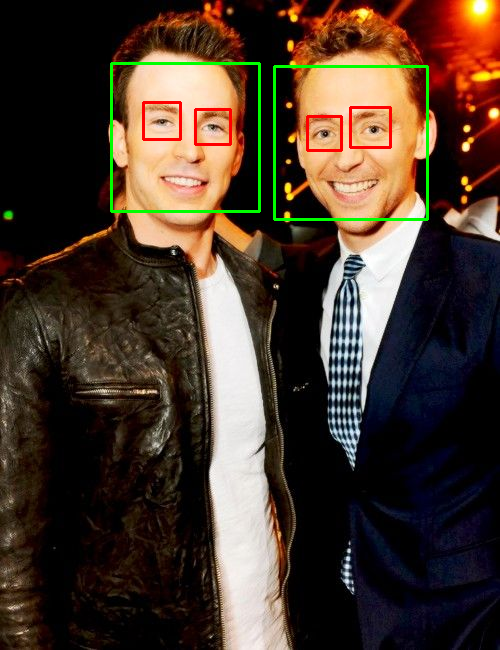

In [31]:
image = cv2.imread('/content/634c5aa8fcf88ee94f4d8a2f71e8e5f2.jpg')
#image = cv2.resize(image, (800, 600))
print(image.shape)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

face_detections = face_detector.detectMultiScale(image_gray, scaleFactor = 1.3, minSize = (30,30))
for (x, y, w, h) in face_detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)

eye_detections = eye_detector.detectMultiScale(image_gray, scaleFactor = 1.01, minNeighbors=10, maxSize=(70,70))
for (x, y, w, h) in eye_detections:
  print(w, h)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 2)

cv2_imshow(image)

#### Full body

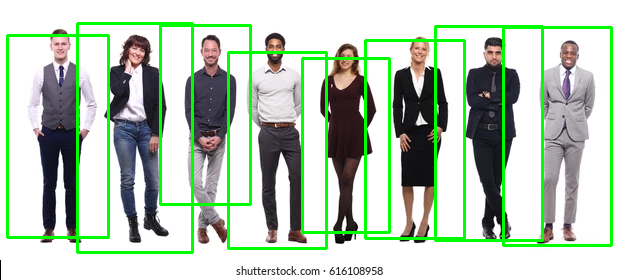

In [43]:
full_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Computer Vision Masterclass/Cascades/fullbody.xml')
image = cv2.imread('/content/team-full-body-people-.webp')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = full_detector.detectMultiScale(image_gray, scaleFactor = 1.04, minNeighbors=5,
                                              minSize = (50,50)) 
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

## Dlib

In [44]:
import dlib

### Detecting faces with HOG

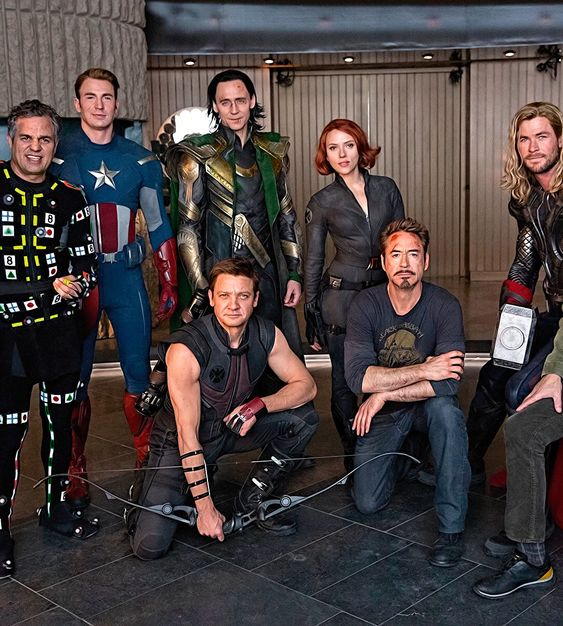

In [45]:
image = cv2.imread('/content/marvel.jpg')
cv2_imshow(image)

In [46]:
face_detector_hog = dlib.get_frontal_face_detector()

In [47]:
detections = face_detector_hog(image, 1)

In [48]:
detections, len(detections)

(rectangles[[(12, 127) (55, 170)], [(511, 122) (554, 166)], [(213, 286) (256, 329)], [(213, 90) (249, 126)], [(74, 84) (117, 127)], [(381, 242) (424, 286)], [(325, 134) (361, 170)]],
 7)

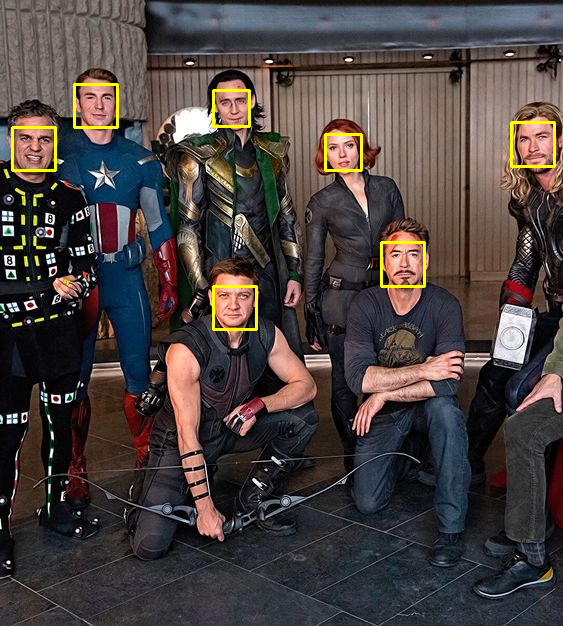

In [49]:
for face in detections:
  #print(face)
  #print(face.left())
  #print(face.top())
  #print(face.right())
  #print(face.bottom())
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image, (l, t), (r, b), (0, 255, 255), 2)
cv2_imshow(image)

### Detecting faces with CNN (Convolutional Neural Networks)

In [52]:
image = cv2.imread('/content/marvel.jpg')
cnn_detector = dlib.cnn_face_detection_model_v1('/content/drive/MyDrive/Computer Vision Masterclass/Weights/mmod_human_face_detector.dat')

1.091551423072815
1.0733534097671509
1.057371973991394
1.0530526638031006
1.051548719406128
1.0484663248062134
1.0436772108078003


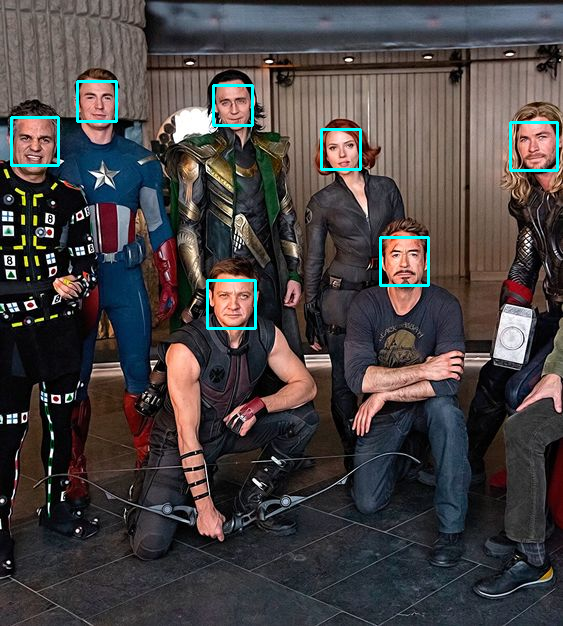

In [53]:
detections = cnn_detector(image, 1)
for face in detections:
  l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
  print(c)
  cv2.rectangle(image, (l, t), (r, b), (255, 255, 0), 2)
cv2_imshow(image)